In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [77]:
df=pd.read_csv('movie_review.csv')

In [3]:
df.head()

text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0

In [5]:
df=df.drop('label',axis=1)

In [6]:
df

text
0     I always wrote this series off as being a comp...
1     1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...
2     This movie was so poorly written and directed ...
3     The most interesting thing about Miryang (Secr...
4     when i first read about "berlin am meer" i did...
...                                                 ...
4995  This is the kind of picture John Lassiter woul...
4996  A MUST SEE! I saw WHIPPED at a press screening...
4997  NBC should be ashamed. I wouldn't allow my chi...
4998  This movie is a clumsy mishmash of various gho...
4999  Formula movie about the illegitimate son of a ...

[5000 rows x 1 columns]

In [8]:
df.duplicated().sum()

5

In [14]:
df=df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [15]:
df.describe()


text
count                                                4995
unique                                               4995
top     I always wrote this series off as being a comp...
freq                                                    1

In [16]:
!pip install -q pyspellchecker
!pip install -q spell-checker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 14.8 MB/s eta 0:00:00
ERROR: Cannot install spell-checker==1.1.0, spell-checker==1.2.0, spell-checker==1.2.5, spell-checker==1.3.0, spell-checker==1.4.0, spell-checker==1.5.0, spell-checker==1.6.0 and spell-checker==1.6.1 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: 

In [35]:

from tqdm.notebook import tqdm

In [36]:
import nltk
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [37]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import random

In [20]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
languages = stopwords.fileids()
print("Number of supported languages:", len(languages))
print("Supported languages:", languages)

Number of supported languages: 29
Supported languages: ['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [38]:
!pip install -q langdetect

In [39]:
from langdetect import detect

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None

df['Language'] = df['text'].apply(detect_language)

In [40]:
df

text Language  sentiment  \
0     I always wrote this series off as being a comp...       en     0.9935   
1     1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...       en    -0.1618   
2     This movie was so poorly written and directed ...       en    -0.9683   
3     The most interesting thing about Miryang (Secr...       en    -0.9947   
4     when i first read about "berlin am meer" i did...       en    -0.6673   
...                                                 ...      ...        ...   
4995  This is the kind of picture John Lassiter woul...       en     0.9104   
4996  A MUST SEE! I saw WHIPPED at a press screening...       en     0.9880   
4997  NBC should be ashamed. I wouldn't allow my chi...       en    -0.6080   
4998  This movie is a clumsy mishmash of various gho...       en    -0.9461   
4999  Formula movie about the illegitimate son of a ...       en     0.5372   

     overall_sentiment  
0             positive  
1             negative  
2             negative  
3             negative  
4             negative  
...                ...  
4995          positive  
4996          positive  
4997          negative  
4998          negative  
4999          positive  

[4995 rows x 4 columns]

In [30]:
spell=SpellChecker()

In [31]:
def label_sentiment(x:float):
    if x < -0.05 : return 'negative'
    if x > 0.35 : return 'positive'
    return 'neutral'

In [32]:
sia = SIA()

In [42]:
df['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(df['text'])]
df['overall_sentiment'] = df['sentiment'].apply(label_sentiment);

  0%|          | 0/4995 [00:00<?, ?it/s]

In [41]:
df.head(10)

text Language  sentiment  \
0  I always wrote this series off as being a comp...       en     0.9935   
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...       en    -0.1618   
2  This movie was so poorly written and directed ...       en    -0.9683   
3  The most interesting thing about Miryang (Secr...       en    -0.9947   
4  when i first read about "berlin am meer" i did...       en    -0.6673   
5  I saw this film on September 1st, 2005 in Indi...       en     0.9940   
6  I saw a screening of this movie last night. I ...       en     0.9940   
7  William Hurt may not be an American matinee id...       en     0.9688   
8  IT IS A PIECE OF CRAP! not funny at all. durin...       en    -0.9922   
9  I'M BOUT IT(1997)<br /><br />Developed & publi...       en     0.7949   

  overall_sentiment  
0          positive  
1          negative  
2          negative  
3          negative  
4          negative  
5          positive  
6          positive  
7          positive  
8          negative  
9          positive

In [43]:
df['overall_sentiment'].value_counts()

overall_sentiment
positive    3084
negative    1724
neutral      187
Name: count, dtype: int64

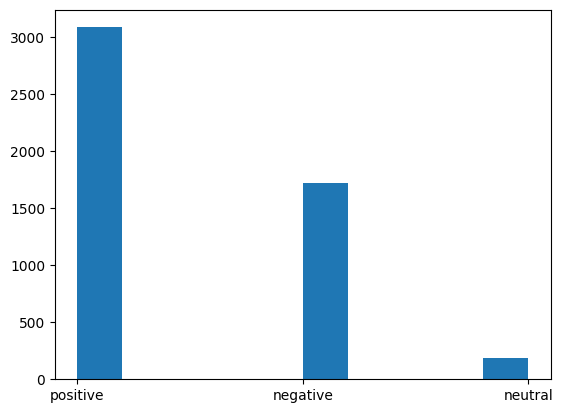

<Figure size 5000x5000 with 0 Axes>

In [48]:
plt.hist(df['overall_sentiment'])
plt.figure(figsize=(50,50))
plt.show()

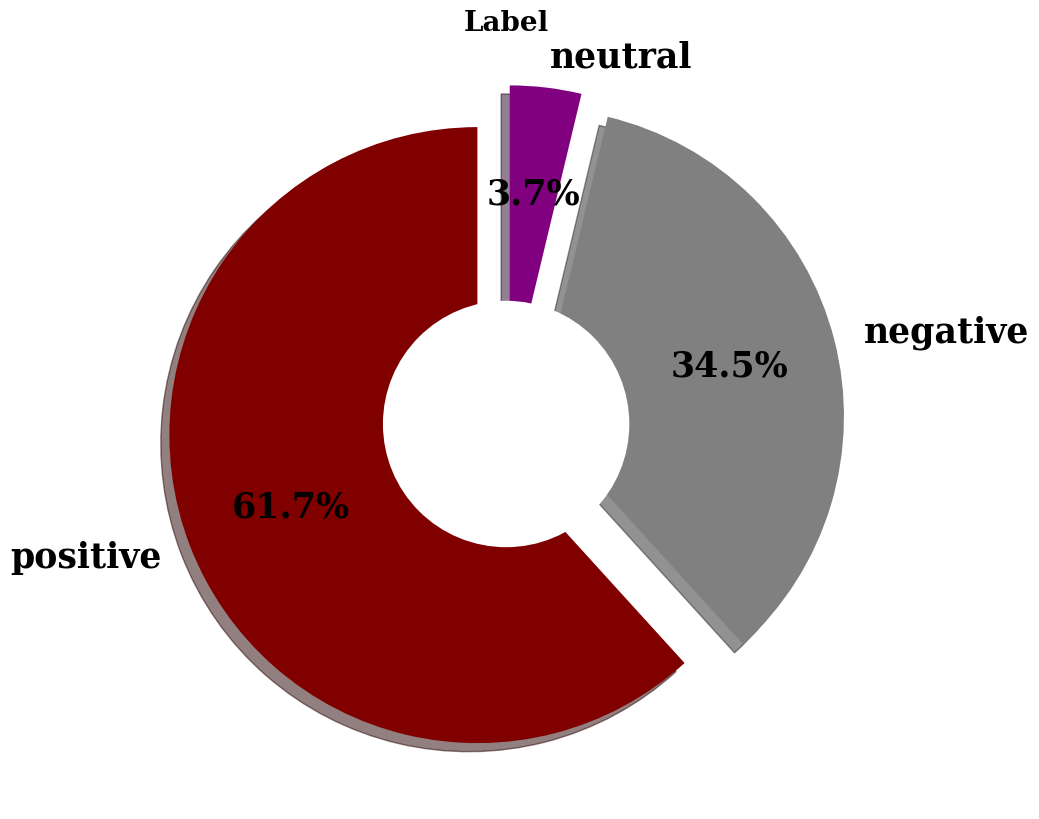

In [52]:
label_data = df['overall_sentiment'].value_counts()

explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['maroon', 'grey', 'purple'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Label', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

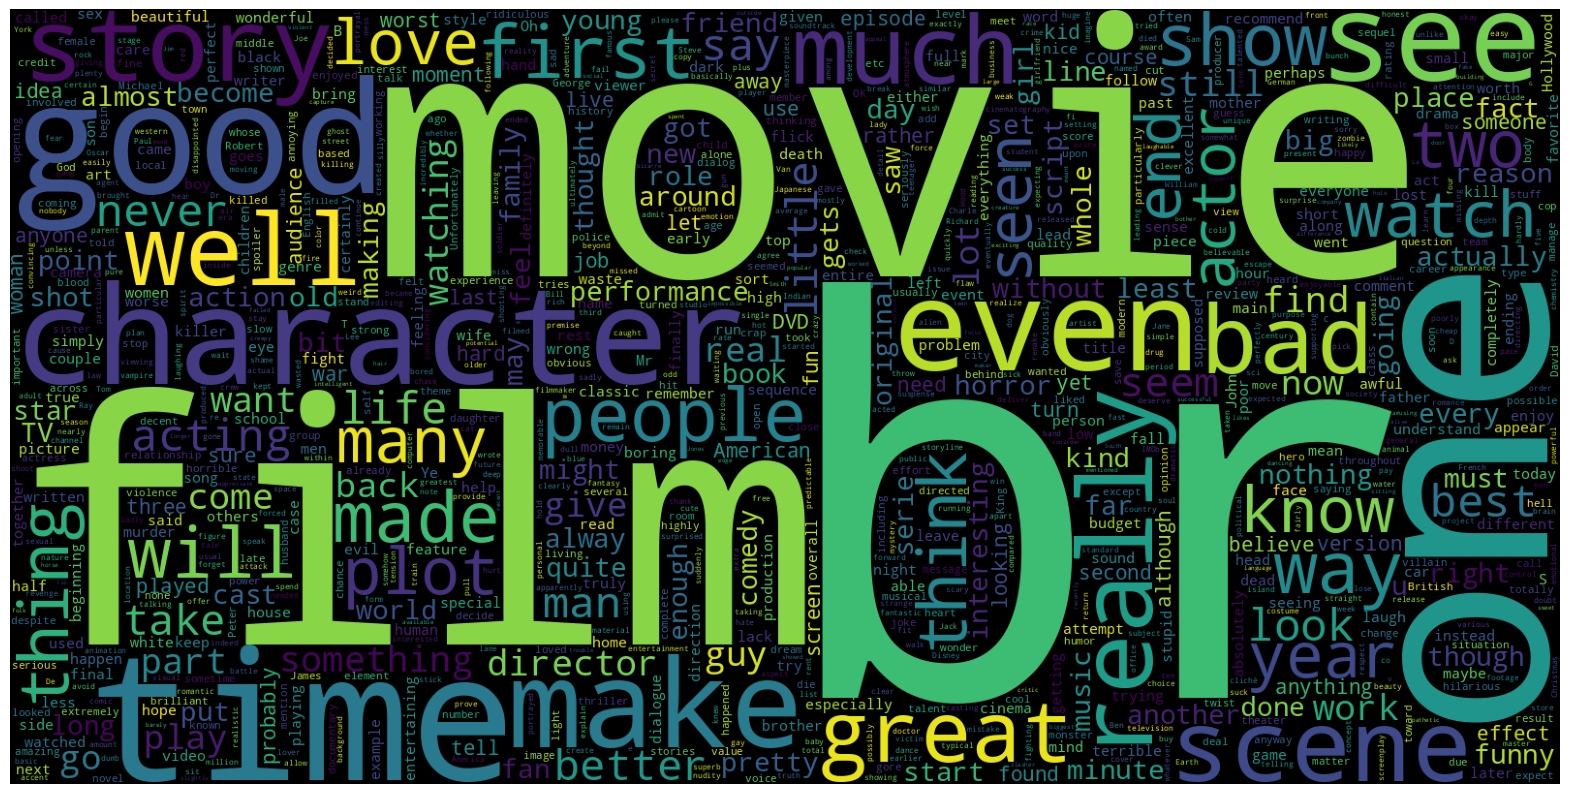

In [55]:
from wordcloud import WordCloud
data = df['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

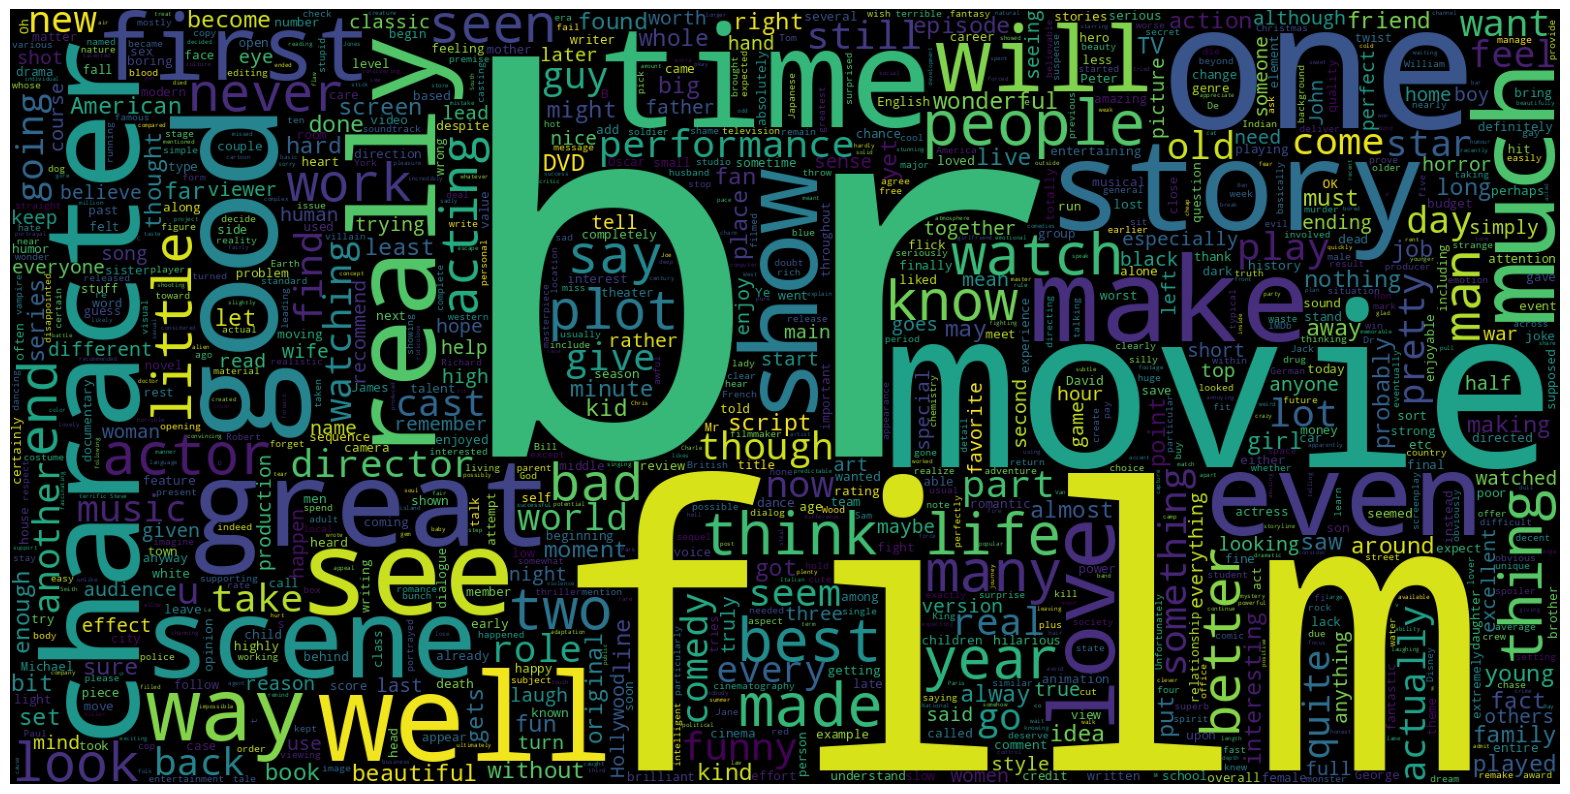

In [57]:
data = df[df['overall_sentiment']=="positive"]['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

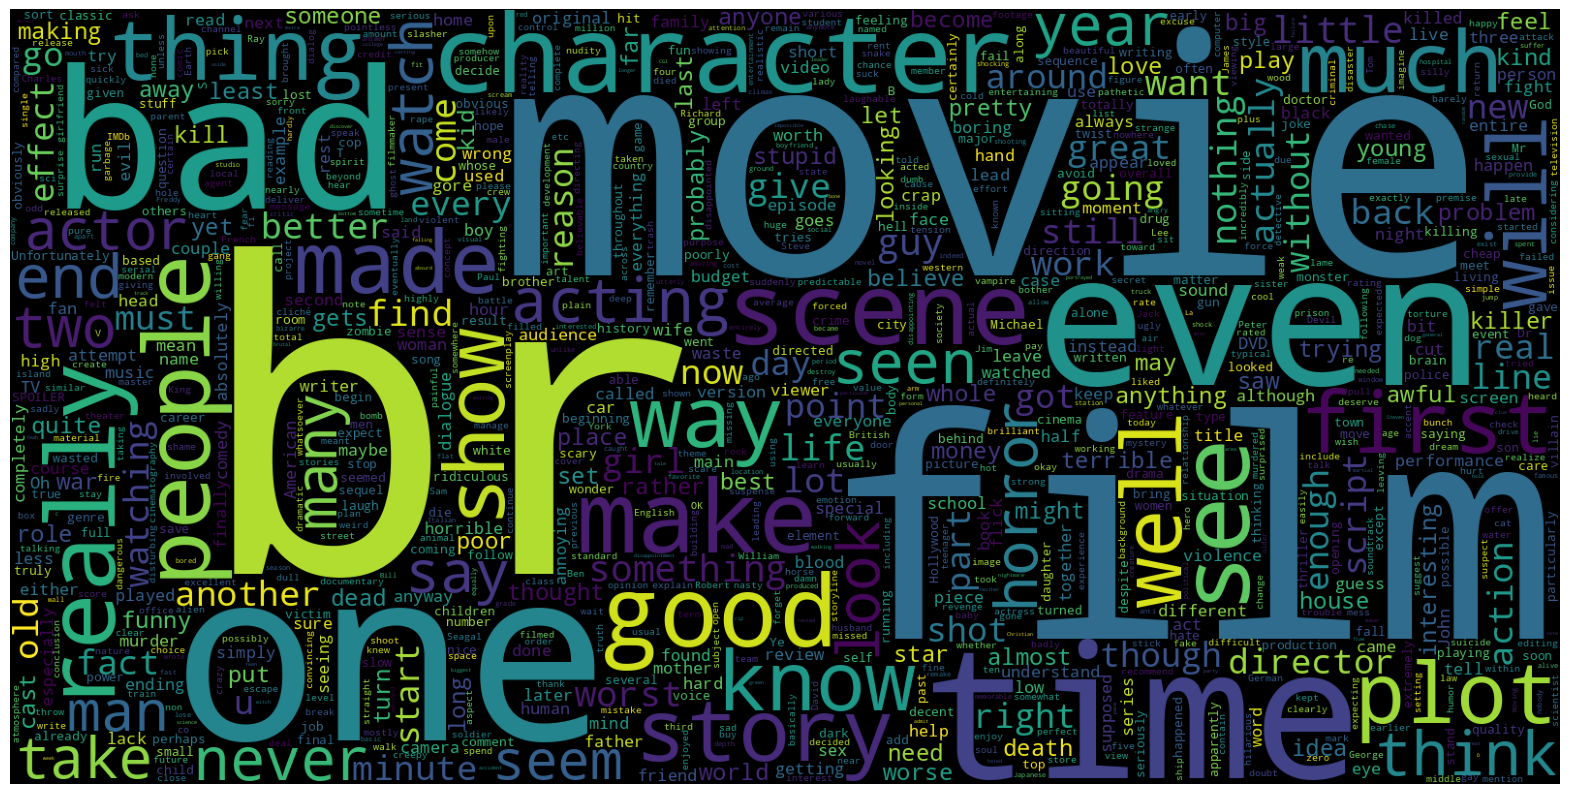

In [58]:
data = df[df['overall_sentiment']=="negative"]['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

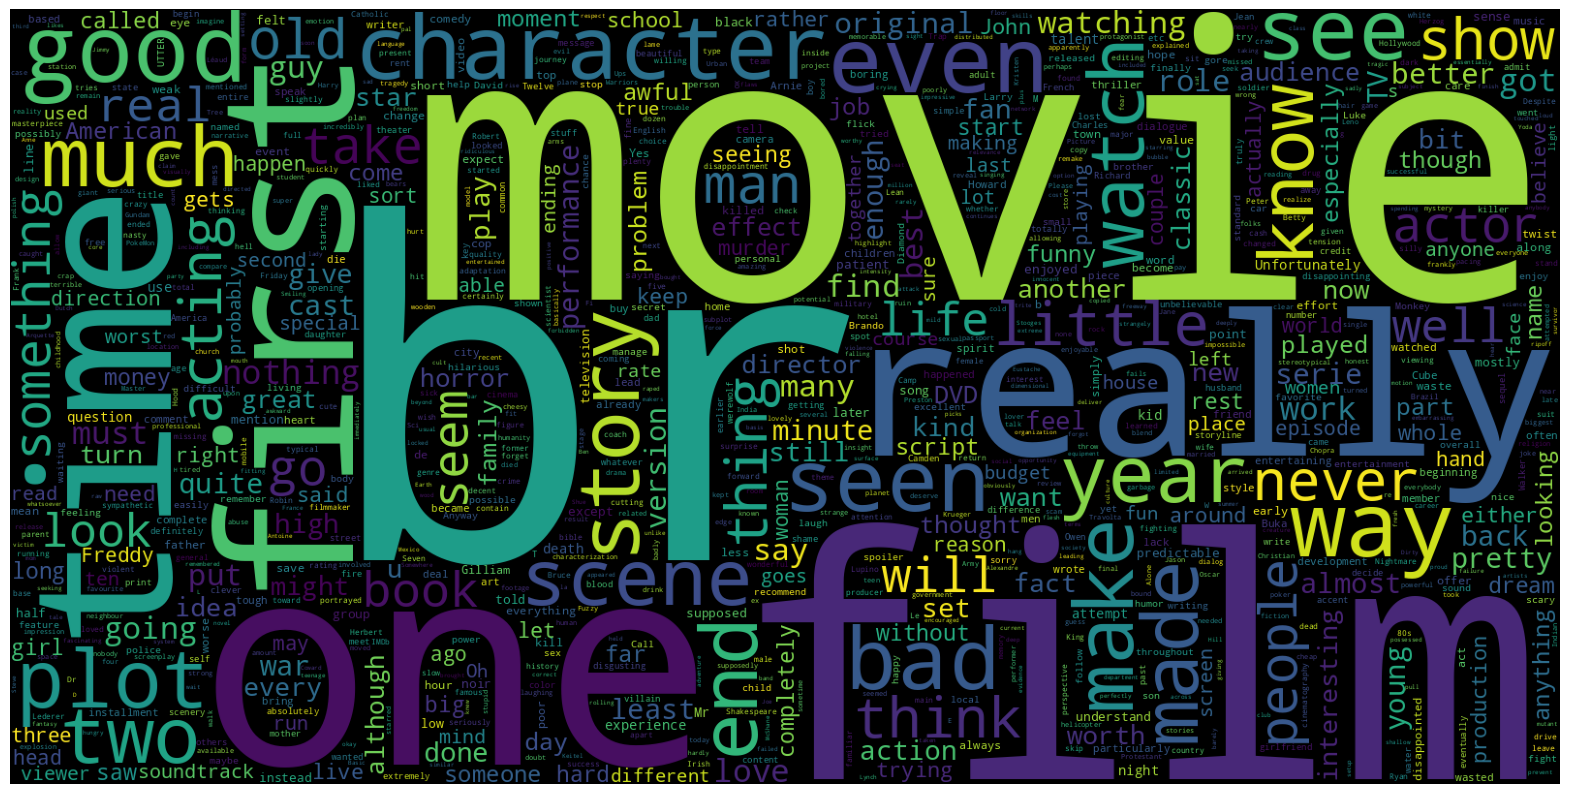

In [59]:
data = df[df['overall_sentiment']=="neutral"]['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [61]:
x = df['text']
y = df['overall_sentiment']

print(len(x), len(y))

4995 4995


In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

3746 3746
1249 1249


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [64]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [65]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<3746x34494 sparse matrix of type '<class 'numpy.float64'>'
	with 512863 stored elements in Compressed Sparse Row format>

In [68]:
texts = df['text']
target = df['overall_sentiment']

In [69]:
from keras.preprocessing.text import Tokenizer

In [70]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

43602

In [71]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize

In [72]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [73]:
def embed(corpus):
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts),
    length_long_sentence,
    padding='post'
)

train_padded_sentences

array([[  10,  219,  927, ...,    0,    0,    0],
       [2888,  294, 1565, ...,    0,    0,    0],
       [  11,   17,   13, ...,    0,    0,    0],
       ...,
       [6404,  140,   26, ...,    0,    0,    0],
       [  11,   17,    6, ...,    0,    0,    0],
       [2501,   17,   44, ...,    0,    0,    0]], dtype=int32)

In [74]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_dtm, y_train)

MultinomialNB()

In [75]:
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [76]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7373899119295436
